## 1 pandas 基本介绍

In [3]:
import pandas as pd
import numpy as np

s = pd.Series([1,3,6,np.nan,44,1])
print(s)

0     1.0
1     3.0
2     6.0
3     NaN
4    44.0
5     1.0
dtype: float64


In [4]:
dates = pd.date_range('20210823',periods=6)
print(dates)

DatetimeIndex(['2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26',
               '2021-08-27', '2021-08-28'],
              dtype='datetime64[ns]', freq='D')


In [5]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=['a','b','c','d']) # randn产生随机数 
print(df)

                   a         b         c         d
2021-08-23 -0.292332 -1.249332  1.661923 -0.174345
2021-08-24  0.385871 -0.241205 -0.975572 -0.227036
2021-08-25  0.608249  0.525965  1.420664  0.362081
2021-08-26 -1.767358 -0.479192  0.900635 -0.508770
2021-08-27 -0.108412 -0.722863  0.387900  0.956791
2021-08-28  0.427214 -0.134833  0.152999 -0.922964


In [7]:
df1 = pd.DataFrame(np.arange(12).reshape((3,4)))
print(df1)

   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11


In [22]:
df2 = pd.DataFrame({
    'A':1.,
    'B':pd.Timestamp('20210823'),
    'C':pd.Series(1,index=list(range(4)),dtype='float32'),
    'D':np.array([3]*4,dtype='int32'),
    'E':pd.Categorical(['test','train','test','train']),
    'F':'foo'
})
print(df2,end="\n\n")
print(df2.dtypes,end="\n\n")
print("行名",df2.index,end="\n\n")
print("列名",df2.columns,end="\n\n")
print("值",df2.values,end="\n\n")

     A          B    C  D      E    F
0  1.0 2021-08-23  1.0  3   test  foo
1  1.0 2021-08-23  1.0  3  train  foo
2  1.0 2021-08-23  1.0  3   test  foo
3  1.0 2021-08-23  1.0  3  train  foo

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

行名 Int64Index([0, 1, 2, 3], dtype='int64')

列名 Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

值 [[1.0 Timestamp('2021-08-23 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2021-08-23 00:00:00') 1.0 3 'train' 'foo']
 [1.0 Timestamp('2021-08-23 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2021-08-23 00:00:00') 1.0 3 'train' 'foo']]



In [21]:
print("描述性信息",df2.describe(),end="\n\n")
print(df2.T)

描述性信息          A    C    D
count  4.0  4.0  4.0
mean   1.0  1.0  3.0
std    0.0  0.0  0.0
min    1.0  1.0  3.0
25%    1.0  1.0  3.0
50%    1.0  1.0  3.0
75%    1.0  1.0  3.0
max    1.0  1.0  3.0

                     0                    1                    2  \
A                    1                    1                    1   
B  2021-08-23 00:00:00  2021-08-23 00:00:00  2021-08-23 00:00:00   
C                    1                    1                    1   
D                    3                    3                    3   
E                 test                train                 test   
F                  foo                  foo                  foo   

                     3  
A                    1  
B  2021-08-23 00:00:00  
C                    1  
D                    3  
E                train  
F                  foo  


In [26]:
print(df2.sort_index(axis=1,ascending=False),end="\n\n") #按行排序
print(df2.sort_index(axis=1,ascending=False),end="\n\n") #按列排序
print(df2.sort_values(by='E'),end="\n\n") #对某一列排序

     F      E  D    C          B    A
0  foo   test  3  1.0 2021-08-23  1.0
1  foo  train  3  1.0 2021-08-23  1.0
2  foo   test  3  1.0 2021-08-23  1.0
3  foo  train  3  1.0 2021-08-23  1.0

     F      E  D    C          B    A
0  foo   test  3  1.0 2021-08-23  1.0
1  foo  train  3  1.0 2021-08-23  1.0
2  foo   test  3  1.0 2021-08-23  1.0
3  foo  train  3  1.0 2021-08-23  1.0

     A          B    C  D      E    F
0  1.0 2021-08-23  1.0  3   test  foo
2  1.0 2021-08-23  1.0  3   test  foo
1  1.0 2021-08-23  1.0  3  train  foo
3  1.0 2021-08-23  1.0  3  train  foo



## 2 pandas 选择数据

In [39]:
dates = pd.date_range('20210101',periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates,columns=['A','B','C','D'])
print(df)

             A   B   C   D
2021-01-01   0   1   2   3
2021-01-02   4   5   6   7
2021-01-03   8   9  10  11
2021-01-04  12  13  14  15
2021-01-05  16  17  18  19
2021-01-06  20  21  22  23


In [40]:
print(df['A'],end="\n\n")
print(df.A)

2021-01-01     0
2021-01-02     4
2021-01-03     8
2021-01-04    12
2021-01-05    16
2021-01-06    20
Freq: D, Name: A, dtype: int32

2021-01-01     0
2021-01-02     4
2021-01-03     8
2021-01-04    12
2021-01-05    16
2021-01-06    20
Freq: D, Name: A, dtype: int32


In [41]:
print(df[0:3],end="\n\n")
print(df["20210102":"20210104"])

            A  B   C   D
2021-01-01  0  1   2   3
2021-01-02  4  5   6   7
2021-01-03  8  9  10  11

             A   B   C   D
2021-01-02   4   5   6   7
2021-01-03   8   9  10  11
2021-01-04  12  13  14  15


In [42]:
# loc 以标签index 来选择
print(df.loc['20210104'],end="\n\n")
print(df.loc[:,['A','B']],end="\n\n")
print(df.loc['2021-01-02',['A','B']])

A    12
B    13
C    14
D    15
Name: 2021-01-04 00:00:00, dtype: int32

             A   B
2021-01-01   0   1
2021-01-02   4   5
2021-01-03   8   9
2021-01-04  12  13
2021-01-05  16  17
2021-01-06  20  21

A    4
B    5
Name: 2021-01-02 00:00:00, dtype: int32


In [43]:
# iloc 以位置来选择
print(df.iloc[3],end="\n\n") #第三行
print(df.iloc[3,1],end="\n\n")
print(df.iloc[3:5,1:3],end="\n\n")
print(df.iloc[[1,3,5],1:3])

A    12
B    13
C    14
D    15
Name: 2021-01-04 00:00:00, dtype: int32

13

             B   C
2021-01-04  13  14
2021-01-05  17  18

             B   C
2021-01-02   5   6
2021-01-04  13  14
2021-01-06  21  22


In [44]:
# ix 混合筛选
print(df.ix[:3,['A','D']])

            A   D
2021-01-01  0   3
2021-01-02  4   7
2021-01-03  8  11


E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [45]:
# bool 筛选
print(df,end="\n\n")
print(df[df.A>8])

             A   B   C   D
2021-01-01   0   1   2   3
2021-01-02   4   5   6   7
2021-01-03   8   9  10  11
2021-01-04  12  13  14  15
2021-01-05  16  17  18  19
2021-01-06  20  21  22  23

             A   B   C   D
2021-01-04  12  13  14  15
2021-01-05  16  17  18  19
2021-01-06  20  21  22  23


##  3 设置值

In [54]:
dates = pd.date_range('20210101',periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates,columns=['A','B','C','D'])
print(df,end="\n\n")
df.iloc[1,3]=1111
df.loc["20210102","B"]=2222
print(df)

             A   B   C   D
2021-01-01   0   1   2   3
2021-01-02   4   5   6   7
2021-01-03   8   9  10  11
2021-01-04  12  13  14  15
2021-01-05  16  17  18  19
2021-01-06  20  21  22  23

             A     B   C     D
2021-01-01   0     1   2     3
2021-01-02   4  2222   6  1111
2021-01-03   8     9  10    11
2021-01-04  12    13  14    15
2021-01-05  16    17  18    19
2021-01-06  20    21  22    23


In [55]:
df[df.A>4]=0
print(df,end="\n\n")

dates = pd.date_range('20210101',periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates,columns=['A','B','C','D'])
df.A[df.A>4]=0 #防止更改其它列的值 df.B[df.A>4]=0
print(df,end="\n\n")

df['F']=np.nan
print(df,end="\n\n")

df['E']=pd.Series([1,2,3,4,5,6],index=pd.date_range("20210101",periods=6))
print(df)

            A     B  C     D
2021-01-01  0     1  2     3
2021-01-02  4  2222  6  1111
2021-01-03  0     0  0     0
2021-01-04  0     0  0     0
2021-01-05  0     0  0     0
2021-01-06  0     0  0     0

            A   B   C   D
2021-01-01  0   1   2   3
2021-01-02  4   5   6   7
2021-01-03  0   9  10  11
2021-01-04  0  13  14  15
2021-01-05  0  17  18  19
2021-01-06  0  21  22  23

            A   B   C   D   F
2021-01-01  0   1   2   3 NaN
2021-01-02  4   5   6   7 NaN
2021-01-03  0   9  10  11 NaN
2021-01-04  0  13  14  15 NaN
2021-01-05  0  17  18  19 NaN
2021-01-06  0  21  22  23 NaN

            A   B   C   D   F  E
2021-01-01  0   1   2   3 NaN  1
2021-01-02  4   5   6   7 NaN  2
2021-01-03  0   9  10  11 NaN  3
2021-01-04  0  13  14  15 NaN  4
2021-01-05  0  17  18  19 NaN  5
2021-01-06  0  21  22  23 NaN  6


## 4 处理丢失数据

In [57]:
dates = pd.date_range('20210101',periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates,columns=['A','B','C','D'])
df.iloc[0,1]=np.nan
df.iloc[1,2]=np.nan
print(df)

             A     B     C   D
2021-01-01   0   NaN   2.0   3
2021-01-02   4   5.0   NaN   7
2021-01-03   8   9.0  10.0  11
2021-01-04  12  13.0  14.0  15
2021-01-05  16  17.0  18.0  19
2021-01-06  20  21.0  22.0  23


In [61]:
print(df.dropna(),end="\n\n") #丢弃缺失值
print(df.dropna(axis=0,how='any'),end="\n\n") #how={'any','all'},axis=0表示丢弃行
print(df.dropna(axis=1,how='any'))

             A     B     C   D
2021-01-03   8   9.0  10.0  11
2021-01-04  12  13.0  14.0  15
2021-01-05  16  17.0  18.0  19
2021-01-06  20  21.0  22.0  23

             A     B     C   D
2021-01-03   8   9.0  10.0  11
2021-01-04  12  13.0  14.0  15
2021-01-05  16  17.0  18.0  19
2021-01-06  20  21.0  22.0  23

             A   D
2021-01-01   0   3
2021-01-02   4   7
2021-01-03   8  11
2021-01-04  12  15
2021-01-05  16  19
2021-01-06  20  23


In [65]:
print(df.fillna(value=0)) #填充缺失值为value
print(df.isnull()) #是否为缺失值
print(np.any(df.isnull())==True) #是否有缺失值

             A     B     C   D
2021-01-01   0   0.0   2.0   3
2021-01-02   4   5.0   0.0   7
2021-01-03   8   9.0  10.0  11
2021-01-04  12  13.0  14.0  15
2021-01-05  16  17.0  18.0  19
2021-01-06  20  21.0  22.0  23
                A      B      C      D
2021-01-01  False   True  False  False
2021-01-02  False  False   True  False
2021-01-03  False  False  False  False
2021-01-04  False  False  False  False
2021-01-05  False  False  False  False
2021-01-06  False  False  False  False
A    False
B     True
C     True
D    False
dtype: bool


##  5 导入导出

In [71]:
#官网链接 https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html
data = pd.read_csv("student.csv")
print(data)
data.to_pickle('student.pickle')

    Student ID  name   age  gender
0         1100  Kelly   22  Female
1         1101    Clo   21  Female
2         1102  Tilly   22  Female
3         1103   Tony   24    Male
4         1104  David   20    Male
5         1105  Catty   22  Female
6         1106      M    3  Female
7         1107      N   43    Male
8         1108      A   13    Male
9         1109      S   12    Male
10        1110  David   33    Male
11        1111     Dw    3  Female
12        1112      Q   23    Male
13        1113      W   21  Female


## 6 合并 concat

In [76]:
#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['a','b','c','d'])

#concat纵向合并
res = pd.concat([df1, df2, df3], axis=0) #行合并
print(res,end="\n\n")

res = pd.concat([df1, df2, df3], axis=0,ignore_index=True) #行索引重拍 
print(res,end="\n\n")

res = pd.concat([df1, df2, df3], axis=1) #列合并
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0

     a    b    c    d    a    b    c    d    a    b    c    d
0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0
1  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0


In [79]:
# join,['inner','outer']
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'],index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'],index=[2,3,4])
print(df1)
print(df2,end="\n\n")

res = pd.concat([df1,df2]) # join='inner'
print(res,end="\n\n") #默认外连接 outer  不同的也会留下，用 NaN 填充  并集

res = pd.concat([df1,df2],join='inner') # 也可以加 ingore_index=True
print(res,end="\n\n") #内连接 inner 只有相同的留下  交集

     a    b    c    d
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0
     b    c    d    e
2  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0

     a    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN
2  0.0  0.0  0.0  0.0  NaN
3  0.0  0.0  0.0  0.0  NaN
2  NaN  1.0  1.0  1.0  1.0
3  NaN  1.0  1.0  1.0  1.0
4  NaN  1.0  1.0  1.0  1.0

     b    c    d
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  0.0  0.0  0.0
2  1.0  1.0  1.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0



E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  import sys


In [83]:
res = pd.concat([df1, df2], axis=1)
print(res,end="\n\n")

#依照`df1.index`进行横向合并
res = pd.concat([df1, df2], axis=1, join_axes=[df1.index])
print(res,end="\n\n")

#依照`df2.index`进行横向合并
res = pd.concat([df1, df2], axis=1, join_axes=[df2.index])
print(res)

     a    b    c    d    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
4  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0

     a    b    c    d    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0

     a    b    c    d    b    c    d    e
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
4  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0


In [87]:
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])

#将df2合并到df1的下面，以及重置index，并打印出结果
res = df1.append(df2, ignore_index=True)
print(res,end="\n\n")

#合并多个df，将df2与df3合并至df1的下面，以及重置index，并打印出结果
res = df1.append([df2, df3], ignore_index=True)
print(res,end="\n\n")


#合并series，将s1合并至df1，以及重置index，并打印出结果
s1 = pd.Series([1,2,3,4], index=['a','b','c','d'])
res = df1.append(s1, ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  1.0  1.0  1.0  1.0
7  1.0  1.0  1.0  1.0
8  1.0  1.0  1.0  1.0

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  2.0  3.0  4.0


## 7 合并 merge

### 7.1 只有一个key

In [93]:
left = pd.DataFrame({'key':['K0','K1','K2','K3'],
                     'A': ['A0', 'A1', 'A2','A3'],
                     'B': ['B0', 'B1', 'B2','b3']})
right = pd.DataFrame({'key':['K0','K1','K2','K3'],
                      'C': ['C0', 'C1', 'C2','C3'],
                      'D': ['D0', 'D1', 'D2','D3']})
print(left,end="\n\n")
print(right)

  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  b3

  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3


In [94]:
# # select a,b while (a.key1==b.key1)
res = pd.merge(left,right,on='key') # 根据关键字合并
print(res)

  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  b3  C3  D3


### 7.2 有多个key

In [97]:
# 有两个key
left = pd.DataFrame({'key1':['K0','K1','K2','K3'],
                     'key2':['K0','K1','K0','K1'],
                     'A': ['A0', 'A1', 'A2','A3'],
                     'B': ['B0', 'B1', 'B2','b3']})
right = pd.DataFrame({'key1':['K0','K1','K2','K3'],
                      'key2':['K0','K0','K0','K0'],
                      'C': ['C0', 'C1', 'C2','C3'],
                      'D': ['D0', 'D1', 'D2','D3']})
print(left,end="\n\n")
print(right)

  key1 key2   A   B
0   K0   K0  A0  B0
1   K1   K1  A1  B1
2   K2   K0  A2  B2
3   K3   K1  A3  b3

  key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K2   K0  C2  D2
3   K3   K0  C3  D3


In [98]:
# select a,b while (a.key1==b.key1) and (a.key2==b.key2)
res = pd.merge(left,right,on=['key1','key2']) #默认是inner。how=["inner",'outer','left','right']
print(res) 

  key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K2   K0  A2  B2  C2  D2


In [102]:
df1 = pd.DataFrame({'col1':[0,1],'col_left':['a','b']})
df2 = pd.DataFrame({'col1':[1,2,3],'col_right':[2,2,2]})
print(df1)
print(df2,end="\n\n")

# 显示是不是合并的两个数据都有值
res = pd.merge(df1,df2,on='col1',how='outer',indicator=True)#改名字可以indicator="AA" 
print(res)

   col1 col_left
0     0        a
1     1        b
   col1  col_right
0     1          2
1     2          2
2     3          2

   col1 col_left  col_right      _merge
0     0        a        NaN   left_only
1     1        b        2.0        both
2     2      NaN        2.0  right_only
3     3      NaN        2.0  right_only


### 7.3 用 index

In [107]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])
print(left)
print(right,end="\n\n")

#依据左右资料集的index进行合并，how='outer',并打印出
res = pd.merge(left, right, left_index=True, right_index=True, how='outer') #how=["inner",'outer']
print(res)

     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2
     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3

      A    B    C    D
K0   A0   B0   C0   D0
K1   A1   B1  NaN  NaN
K2   A2   B2   C2   D2
K3  NaN  NaN   C3   D3


### 7.4 解决 overlapping 的问题

In [116]:
boys = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'age': [1, 2, 3]})
girls = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'age': [4, 5, 6]})

#使用suffixes解决overlapping的问题
# 两数据中 age 列名相同，但实际是不同的两组数据。用 suffixex 来重命名
res = pd.merge(boys, girls, on='k', suffixes=['_boy', '_girl'], how='inner')
print(res) 

    k  age_boy  age_girl
0  K0        1         4
1  K0        1         5


## plot 画图

<IPython.core.display.Javascript object>


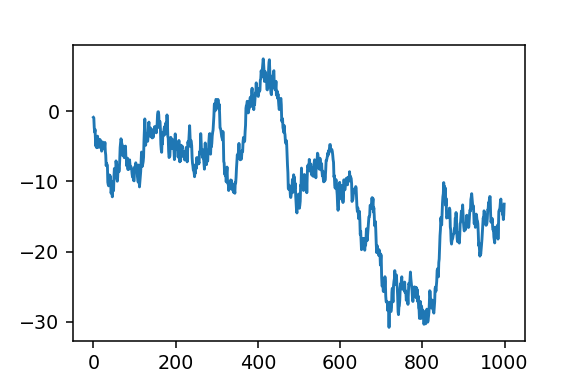

In [117]:
import matplotlib.pyplot as plt
%matplotlib notebook


# 随机生成1000个数据
data = pd.Series(np.random.randn(1000),index=np.arange(1000))
# 为了方便观看效果, 我们累加这个数据
data = data.cumsum()

data.plot()
plt.show()

          A         B         C         D
0 -0.224539 -0.622456  0.213368  0.251068
1 -0.889679 -1.999832  2.133443  2.974004
2 -1.514201 -2.619678  1.099911  2.486326
3 -2.715098 -2.983646  2.484683  0.996700
4 -3.335238 -3.886706  1.337085  0.672863


<IPython.core.display.Javascript object>


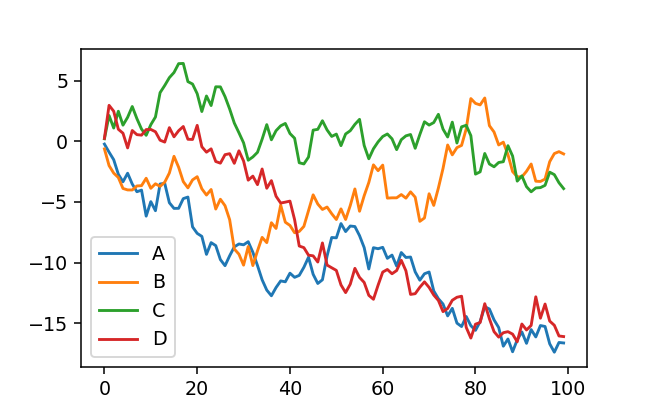

In [120]:
data = pd.DataFrame(
    np.random.randn(100,4),
    index=np.arange(100),
    columns=list("ABCD")
    )
data = data.cumsum()
print(data.head())
data.plot() 
plt.show()

<IPython.core.display.Javascript object>


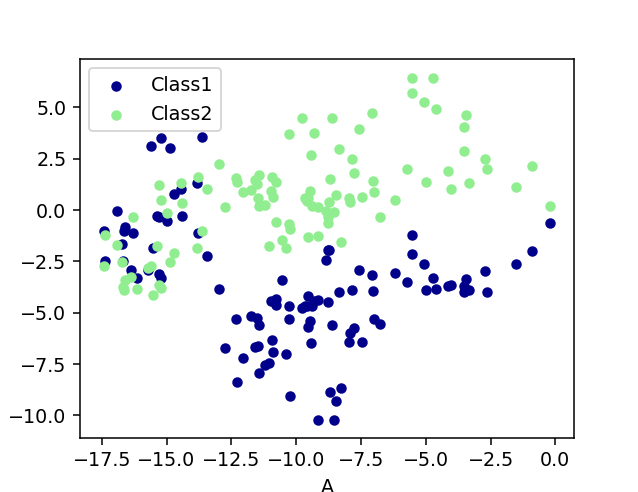

In [122]:
# 'bar','hist','box','area','scatter','hexbin,'pie
# plt.scatter(x=.y=)
# data.plot.scatter(x='A',y='B'),color='DarkBlue'label='Class1')

ax = data.plot.scatter(x='A',y='B',color='DarkBlue',label='Class1')

# 将之下这个 data 画在上一个 ax 上面
data.plot.scatter(x='A',y='C',color='LightGreen',label='Class2',ax=ax)
plt.show()